# Delivery_time -> Predict delivery time using sorting time 
# Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


#*Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ***Salary Dataset***

In [2]:
salary=pd.read_csv("/content/Salary_Data.csv")

In [3]:
salary.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


###Plots and log transformation of columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa362a53110>]],
      dtype=object)

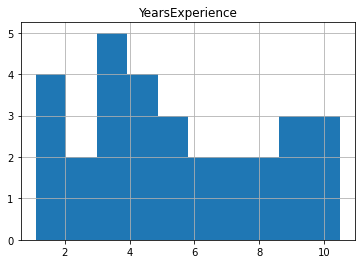

In [5]:
salary.hist("YearsExperience")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


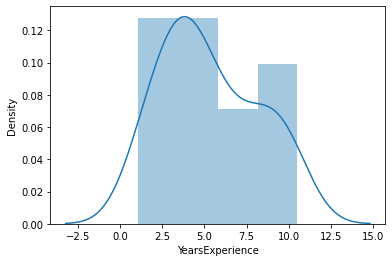

In [6]:
sns.distplot(salary['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


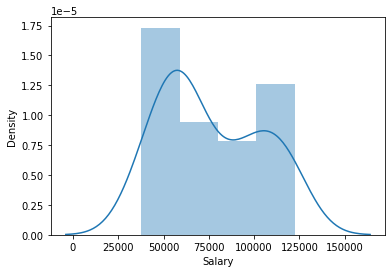

In [7]:
sns.distplot(salary["Salary"])

In [8]:
salary["log_Salary"]=np.log(salary["Salary"])

In [9]:
salary["log_YearsExperience"]=np.log(salary["YearsExperience"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


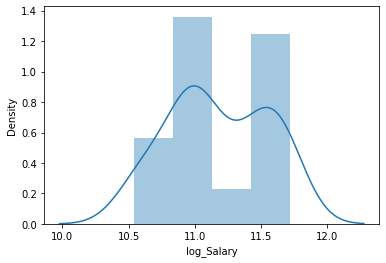

In [10]:
sns.distplot(salary["log_Salary"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


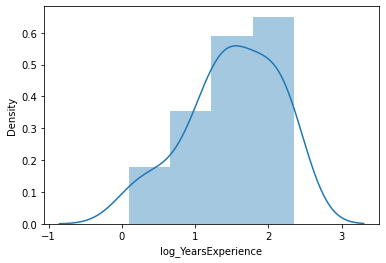

In [11]:
sns.distplot(salary["log_YearsExperience"])

In [12]:
salary.head()

,YearsExperience,Salary,log_Salary,log_YearsExperience
0,1.1,39343.0,10.580073,0.095310
1,1.3,46205.0,10.740843,0.262364
2,1.5,37731.0,10.538237,0.405465
3,2.0,43525.0,10.681091,0.693147
4,2.2,39891.0,10.593906,0.788457


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa35f212b10>]],
      dtype=object)

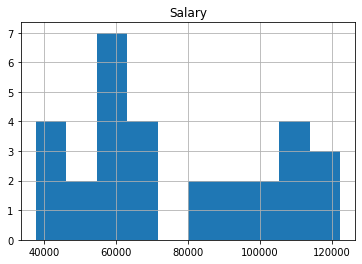

In [13]:
salary.hist("Salary")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa35f19ded0>]],
      dtype=object)

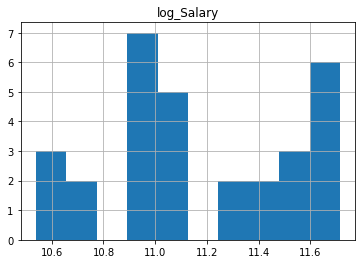

In [14]:
salary.hist("log_Salary")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa35f126350>]],
      dtype=object)

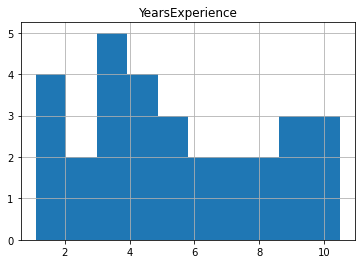

In [15]:
salary.hist("YearsExperience")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3676b8ed0>]],
      dtype=object)

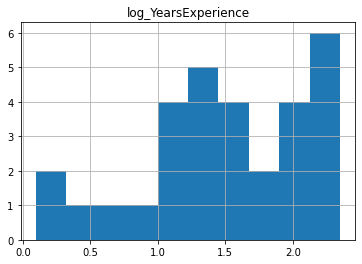

In [16]:
salary.hist("log_YearsExperience")

###Regression model

In [17]:
import statsmodels.formula.api as smf

In [18]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearsExperience      30 non-null     float64
 1   Salary               30 non-null     float64
 2   log_Salary           30 non-null     float64
 3   log_YearsExperience  30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [19]:
log_model=smf.ols("log_Salary~log_YearsExperience", data=salary).fit()

In [20]:
normal_model=smf.ols("Salary~YearsExperience",data=salary).fit()

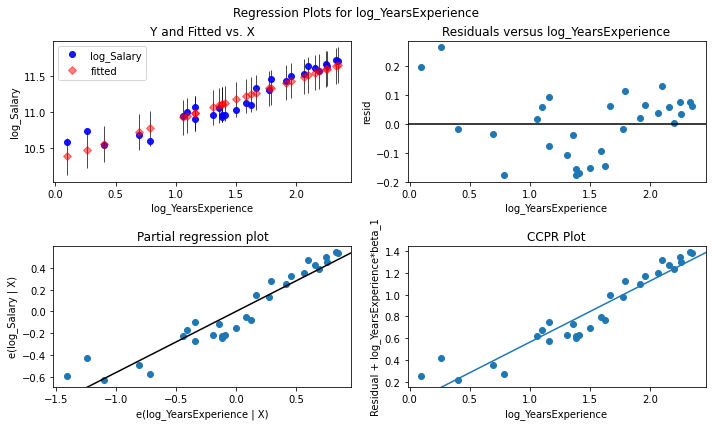

In [21]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(log_model,"log_YearsExperience", fig=fig)

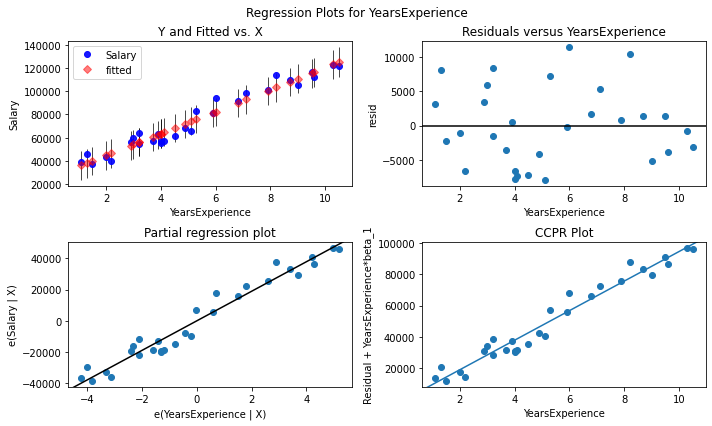

In [22]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(normal_model,"YearsExperience", fig=fig)

In [23]:
log_model.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [24]:
normal_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [25]:
Accuracy=log_model.rsquared
Accuracy

0.905215072581715

In [26]:
Accuracy1=normal_model.rsquared
Accuracy1

0.9569566641435086

In [27]:
normal_model.rsquared_adj

0.9554194021486339

In [28]:
log_model.rsquared_adj

0.9018298966024905

###Model is Ready for salary Dataset

In [29]:
print("This model can Predict salary for experience in range:", (salary["YearsExperience"].min(), salary["YearsExperience"].max())," years With Accuracy of ", Accuracy*100,"%" )
newdata=pd.Series([float(input("Enter your Experience : "))])
data_predict=pd.DataFrame(newdata, columns=["YearsExperience"])
Nsalary=normal_model.predict(data_predict)
print("Based on yor Experience your Expected salary is: ", (Nsalary.values)[0])

This model can Predict salary for experience in range: (1.1, 10.5)  years With Accuracy of  90.5215072581715 %
Enter your Experience : 5
Based on yor Experience your Expected salary is:  73042.01180594407


## Delivery time dataset

In [31]:
dt=pd.read_csv("/content/delivery_time.csv")

In [32]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [33]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [34]:
dt.shape

(21, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


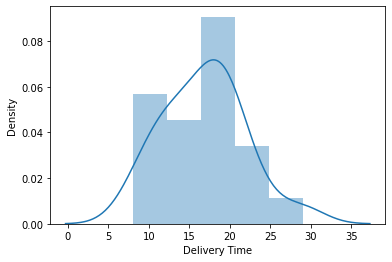

In [35]:
sns.distplot(dt["Delivery Time"])

In [36]:
dt["log_dt"]=np.log(dt["Delivery Time"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


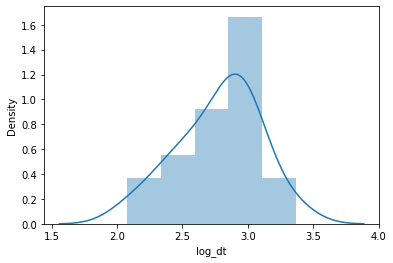

In [37]:
sns.distplot(dt["log_dt"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


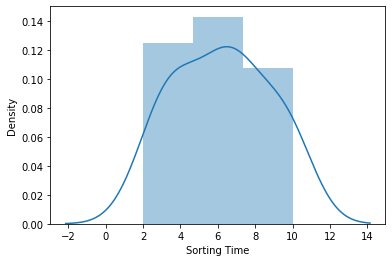

In [38]:
sns.distplot(dt["Sorting Time"])

In [39]:
dt["log_sorting"]=np.log(dt["Sorting Time"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


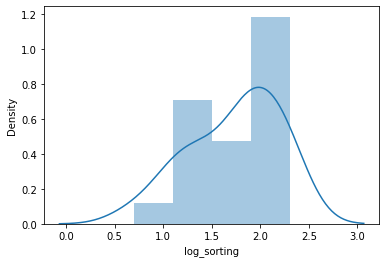

In [40]:
sns.distplot(dt['log_sorting'])

In [41]:
dt.head()

,Delivery Time,Sorting Time,log_dt,log_sorting
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


In [42]:
dl_time=dt.rename({'Delivery Time':'Delivery_Time'}, axis=1)
dl_time1=dl_time.rename({'Sorting Time':'Sorting_Time'},axis=1)

In [43]:
dtnorm_model=smf.ols("Delivery_Time~Sorting_Time",data=dl_time1).fit()

In [44]:
dtlog_model=smf.ols("log_dt~log_sorting",data=dt).fit()

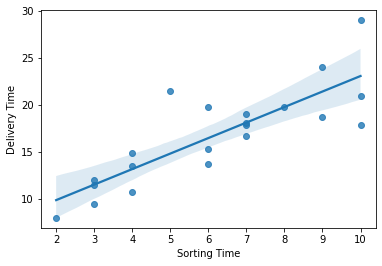

In [45]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=dt)

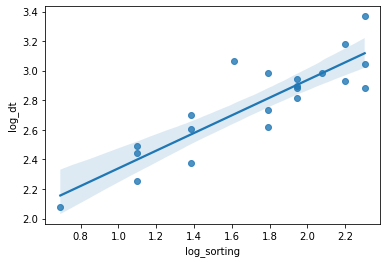

In [46]:
sns.regplot(x="log_sorting", y="log_dt", data=dt)

In [47]:
dtnorm_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [48]:
dtlog_model.params

Intercept      1.741987
log_sorting    0.597522
dtype: float64

In [49]:
(dtnorm_model.rsquared,dtnorm_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [50]:
(dtlog_model.rsquared, dtlog_model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [51]:
accuracy=dtlog_model.rsquared

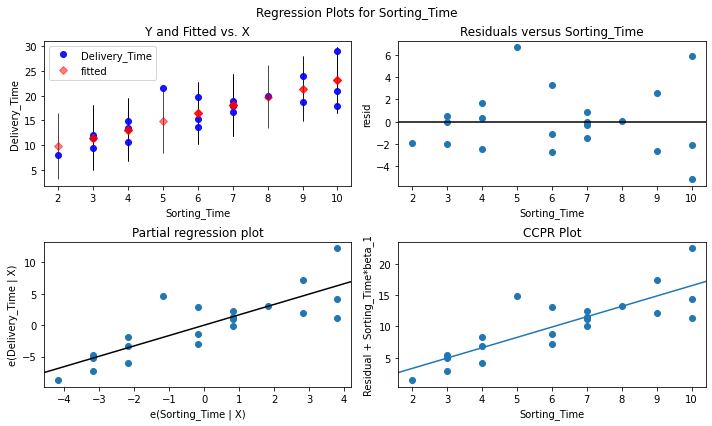

In [52]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(dtnorm_model,"Sorting_Time", fig=fig)

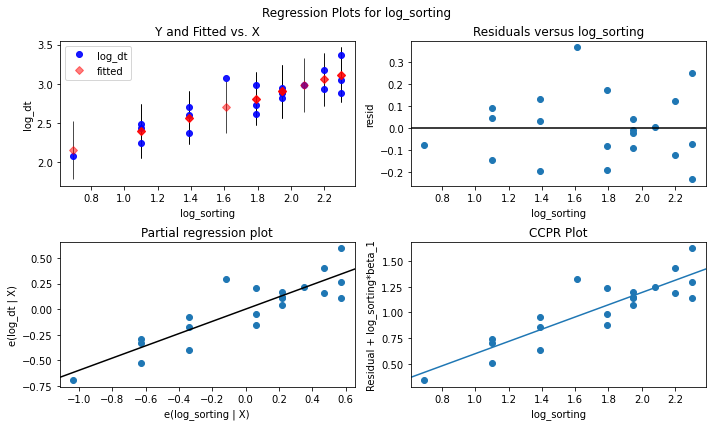

In [53]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(dtlog_model,"log_sorting", fig=fig)

In [54]:
## Log Model has more accuracy than normal model
print("This model ca predict Dleivery time for Sorting time in range:",(dt["Sorting Time"].min(),dt["Sorting Time"].max()))
print("This model take Sorting time as input and Predict delivery time with Accuracy of :",accuracy,"%")
newdata1=pd.Series([(int(input("Enter sorting time: ")))])
data_deltime=pd.DataFrame(newdata1,columns=["log_sorting"])
Ndel_time=dtlog_model.predict((np.log(data_deltime)))
print("Based on your Sorting time Expected Delivery time is :", (np.exp((Ndel_time.values)[0])),"minutes")

This model ca predict Dleivery time for Sorting time in range: (2, 10)
This model take Sorting time as input and Predict delivery time with Accuracy of : 0.77216134926874 %
Enter sorting time: 5
Based on your Sorting time Expected Delivery time is : 14.934323854146893 minutes
